## 1. Mount on Google Drive

In [1]:
# Add Google Drive as an accessible path (Optional if you are running from Jupyter Notebook)
from google.colab import drive
drive.mount('/content/drive')

# change path to the designated google drive folder
# otherwise, data will be saved in /content folder which you may have issue locating 
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


## 2. Pip Install + Import Libraries

In [ ]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 636 kB 8.4 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 5.2 MB 37.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 8.8 MB/s 
     |████████████████████████████████| 1.1 MB 43.9 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330857 sha256=a0b98ef24dad5541ae7409900cf83f90557da4112b43daa9ccefc0bcfa896832
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=53a2c37ce690172c973d73f67eb3ce6d67d01183f409ad3017f9ed5bde105dac
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144

In [2]:
# Import libraries
import urllib.request,sys,time
from bs4 import BeautifulSoup
import requests
import pandas as pd

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

import re
import string

from PIL import Image
import os
from os import path
import csv


import nltk
from nltk.corpus import stopwords

##Functions

In [3]:
# Function to create a dictionary with word counts from dataframe 
def count_words_from_dataframe(df):
    result_dict = {}
    # iterate rows of dataframe 
    for index, row in df.iterrows():
        text = row["clean_text_2"]
        
        # this will split a sentence into words 
        tokens = text.split()
        
        # iterate each word 
        for i in range(0, len(tokens)):
            token = tokens[i].rstrip()
            token=token.strip()
            try:
                result_dict[token] += 1
            except KeyError:
                result_dict[token] = 1
                    
    return result_dict

In [4]:
# Function to write Word Cloud to file
def makeImage(termDict, outputfile):
    
    wc = WordCloud(max_font_size=150, width=1280, height=720, background_color="white")    

    ### generate word cloud using frequencies!
    wc.generate_from_frequencies(termDict)
    wc.to_file(outputfile+".png")
    wc.to_file(outputfile+".pdf")
    
    ### show the figure
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show() 

In [5]:
import string
def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    return text

In [6]:
# Download stopwords
nltk.download('stopwords')

# Variable 'stop' set to list of english stopwords from nltk library
stop = stopwords.words('english')
stop.extend(['ngl','lol','thats','theyre','tbh','idk','rall','theres','youre','yall','dont','aint','ive','arent','havent','wtf','thatll','omg','theyd','woah','fucking','wouldve','shit','wouldve','werent','repost','deleted','heres','wouldnt','fuck','cant','haha'])

def clean_text_round2(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
def read_word_count_file(file_path):
    with open(file_path, mode='r', encoding="latin1") as infile:
        reader = csv.reader(infile)
        counts = {}
        for row in reader:
            if len(row) >0 :
                counts[row[0]] = float(row[1])
        return counts
                
                
        #counts = {rows[0]: float(rows[1]) for rows in reader}
    #return counts

# 3. Reading Data from File

In [8]:
comments=[]
with open('Colab Notebooks/combined_reviews.csv','r', encoding="latin1") as f:
  csv_reader = csv.reader(f)
  for row in csv_reader:
    comments.extend(row)

labels="Reviews"
comments=comments[1:]
#length=len(comments)



In [9]:
print(comments)

['Sukiyaki Beef is good. \n\nSpicy garlic pork cutlet is good. \n\nProm belly katsu don is good! \n\nThunder fries with mentai sauce sibei good!', 'One of my fav store for pork collar. However, today there are a few pieces of burnt meat ð\x9f\x98\x93', 'Delicious food, prompt delivery and excellent service!! ð\x9f\x92¯ð\x9f\x92¯ð\x9f\x92¯', 'Super valued for money. Super affordable but yet restaurant standard sukiyaki beef donð\x9f\x98\x8d \n\nHave been returning weekly to satisfy my cravingsð\x9f\x98\x81\n\nYes, friendly staffs tooð\x9f¤£', 'Definitely a surprise find at punggol. Really affordable Japanese food at a kpt.\nPeople behind the counter were really nice and friendly.\nOrdered a pork belly katsu Don, a katsu platter and an extra serving of rice with onsen egg. And its all less than $20. ð\x9f\x98\x9cð\x9f\x98\x9c\nFood is on point. Portions were big.\nSurely coming back for more.', 'This place is certainly not 5stars worthy \n\nTried the Pork Katsu don & Beef don \n\nBoth fe

# 4. Data Cleaning and EDA

In [10]:
comments_df = pd.DataFrame(comments)
comments_df.columns = ["Reviews"]
comments_df


,Reviews
0,Sukiyaki Beef is good. \n\nSpicy garlic pork c...
1,"One of my fav store for pork collar. However, ..."
2,"Delicious food, prompt delivery and excellent ..."
3,Super valued for money. Super affordable but y...
4,Definitely a surprise find at punggol. Really ...
...,...
128,The soft scrambled eggs with onion was perfect...
129,Their rice bowls could definitely do with more...
130,Sukiyaki Beef Short Plate Don with Onsen Eg etc
131,Felt that the Asian Fusion Donburi branding ...


In [11]:
import string
def clean_text_round1(text):
    '''Make text lowercase, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\n','',text) #remove \n which act as extra lines in reviews
    return text

In [12]:
comments_df["clean_text_1"]=comments_df['Reviews'].apply(clean_text_round1)
comments_df

,Reviews,clean_text_1
0,Sukiyaki Beef is good. \n\nSpicy garlic pork c...,sukiyaki beef is good spicy garlic pork cutlet...
1,"One of my fav store for pork collar. However, ...",one of my fav store for pork collar however to...
2,"Delicious food, prompt delivery and excellent ...",delicious food prompt delivery and excellent s...
3,Super valued for money. Super affordable but y...,super valued for money super affordable but ye...
4,Definitely a surprise find at punggol. Really ...,definitely a surprise find at punggol really a...
...,...,...
128,The soft scrambled eggs with onion was perfect...,the soft scrambled eggs with onion was perfect...
129,Their rice bowls could definitely do with more...,their rice bowls could definitely do with more...
130,Sukiyaki Beef Short Plate Don with Onsen Eg etc,sukiyaki beef short plate don with onsen eg etc
131,Felt that the Asian Fusion Donburi branding ...,felt that the asian fusion donburi branding ...


In [13]:
comments_df['clean_text_2']=comments_df['clean_text_1'].apply(clean_text_round2)
comments_df

,Reviews,clean_text_1,clean_text_2
0,Sukiyaki Beef is good. \n\nSpicy garlic pork c...,sukiyaki beef is good spicy garlic pork cutlet...,sukiyaki beef good spicy garlic pork cutlet go...
1,"One of my fav store for pork collar. However, ...",one of my fav store for pork collar however to...,one fav store pork collar however today pieces...
2,"Delicious food, prompt delivery and excellent ...",delicious food prompt delivery and excellent s...,delicious food prompt delivery excellent servi...
3,Super valued for money. Super affordable but y...,super valued for money super affordable but ye...,super valued money super affordable yet restau...
4,Definitely a surprise find at punggol. Really ...,definitely a surprise find at punggol really a...,definitely surprise find punggol really afford...
...,...,...,...
128,The soft scrambled eggs with onion was perfect...,the soft scrambled eggs with onion was perfect...,soft scrambled eggs onion perfectly cooked
129,Their rice bowls could definitely do with more...,their rice bowls could definitely do with more...,rice bowls could definitely sauce
130,Sukiyaki Beef Short Plate Don with Onsen Eg etc,sukiyaki beef short plate don with onsen eg etc,sukiyaki beef short plate onsen eg etc
131,Felt that the Asian Fusion Donburi branding ...,felt that the asian fusion donburi branding ...,felt asian fusion donburi branding bit far s...


In [14]:
cleaned_df = comments_df[['clean_text_2']]
cleaned_df

,clean_text_2
0,sukiyaki beef good spicy garlic pork cutlet go...
1,one fav store pork collar however today pieces...
2,delicious food prompt delivery excellent servi...
3,super valued money super affordable yet restau...
4,definitely surprise find punggol really afford...
...,...
128,soft scrambled eggs onion perfectly cooked
129,rice bowls could definitely sauce
130,sukiyaki beef short plate onsen eg etc
131,felt asian fusion donburi branding bit far s...


In [15]:
#REMOVE WORDS CONFIRM HIGH LOL
count_type = 'unigram'

result = count_words_from_dataframe(cleaned_df)
try: 
  del result['fukudon']
except:
  print('an error')

## soring the words based on their frequency
sorted_dic = ((k, result[k]) for k in sorted(result, key=result.get, reverse=True))

## write the dictionary in a file
with open(f"./fukudonreviews_unigram_counts.csv", 'w', encoding="latin1") as fp:
    writer = csv.writer(fp, delimiter=',')
    writer.writerows(sorted_dic)

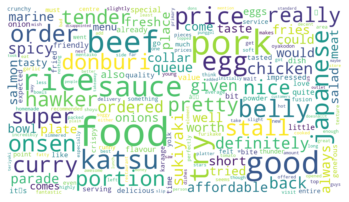

In [16]:
### Create ```plot``` folder 
os.makedirs('plot', exist_ok=True)

mypath="."
### We're using one of the utility function! "read_word_count_file"
fullTermsDict = read_word_count_file(f'{mypath}/fukudonreviews_unigram_counts.csv')
outputfile = f"{mypath}/Colab Notebooks/Unigram/wordcloud_count_unigram_fukudon_reviews"
makeImage(fullTermsDict, outputfile)

In [17]:
reviews_list=cleaned_df['clean_text_2'].tolist()

In [18]:
reviews_list

['sukiyaki beef good spicy garlic pork cutlet good prom belly katsu good thunder fries mentai sauce sibei good',
 'one fav store pork collar however today pieces burnt meat ð\x9f\x98\x93',
 'delicious food prompt delivery excellent service ð\x9f\x92¯ð\x9f\x92¯ð\x9f\x92¯',
 'super valued money super affordable yet restaurant standard sukiyaki beef donð\x9f\x98\x8d returning weekly satisfy cravingsð\x9f\x98\x81yes friendly staffs tooð\x9f¤£',
 'definitely surprise find punggol really affordable japanese food kptpeople behind counter really nice friendlyordered pork belly katsu katsu platter extra serving rice onsen egg less ð\x9f\x98\x9cð\x9f\x98\x9cfood point portions bigsurely coming back',
 'place certainly worthy tried pork katsu beef fell way expectations katsu soggy beef toughhad marine parade outletpunggol outlet might better',
 'groupbuy communication good arrived hot hot portion quite generous well give try',
 'awesome pplawesome food ð\x9f\x98\x81',
 'å\x8d\x81å\x88\x86æ\x8e¨è\

# 5. Hugging Face Text Classification

In [19]:
# this will take some time
!pip install datasets transformers[sentencepiece]

     |████████████████████████████████| 325 kB 6.6 MB/s 
     |████████████████████████████████| 3.8 MB 59.2 MB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 212 kB 72.9 MB/s 
     |████████████████████████████████| 1.1 MB 60.2 MB/s 
     |████████████████████████████████| 134 kB 59.4 MB/s 
     |████████████████████████████████| 127 kB 79.3 MB/s 
     |████████████████████████████████| 271 kB 77.5 MB/s 
     |████████████████████████████████| 144 kB 78.6 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 895 kB 52.5 MB/s 
     |████████████████████████████████| 6.5 MB 50.9 MB/s 
     |████████████████████████████████| 596 kB 75.0 MB/s 
     |████████████████████████████████| 1.2 MB 60.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
   

In [20]:
## This will enable your coLab to use GPU!!! 
import torch
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [21]:
from transformers import pipeline

*italicized text*## Pre-COVID-19

In [22]:
# Load the "sentiment prediction" model.
classifier = pipeline("sentiment-analysis", device = 0)

# input: sentence, output: sentiment label and score
sentiment_list= classifier(reviews_list)
zipped_list=[]
for i in range(len(reviews_list)):
  zipped=[reviews_list[i],sentiment_list[i]['label'],sentiment_list[i]['score']]
  zipped_list.append(zipped)

df_sentiment=pd.DataFrame(zipped_list, columns=['review','sentiment','sentiment score'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [23]:
df_sentiment

,review,sentiment,sentiment score
0,sukiyaki beef good spicy garlic pork cutlet go...,POSITIVE,0.996993
1,one fav store pork collar however today pieces...,NEGATIVE,0.998685
2,delicious food prompt delivery excellent servi...,POSITIVE,0.999809
3,super valued money super affordable yet restau...,NEGATIVE,0.808792
4,definitely surprise find punggol really afford...,POSITIVE,0.936463
...,...,...,...
128,soft scrambled eggs onion perfectly cooked,POSITIVE,0.999613
129,rice bowls could definitely sauce,NEGATIVE,0.912868
130,sukiyaki beef short plate onsen eg etc,NEGATIVE,0.977509
131,felt asian fusion donburi branding bit far s...,NEGATIVE,0.997735


In [24]:
positive_review = df_sentiment.loc[df_sentiment['sentiment'] == 'POSITIVE']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
positive_review

,review,sentiment,sentiment score
0,sukiyaki beef good spicy garlic pork cutlet good prom belly katsu good thunder fries mentai sauce sibei good,POSITIVE,0.996993
2,delicious food prompt delivery excellent service ð¯ð¯ð¯,POSITIVE,0.999809
4,definitely surprise find punggol really affordable japanese food kptpeople behind counter really nice friendlyordered pork belly katsu katsu platter extra serving rice onsen egg less ððfood point portions bigsurely coming back,POSITIVE,0.936463
6,groupbuy communication good arrived hot hot portion quite generous well give try,POSITIVE,0.999091
7,awesome pplawesome food ð,POSITIVE,0.999334
9,good jap food affordable pricingnot mention improved significantly waiting time,POSITIVE,0.993299
10,best best best jap hawker style food ever ðððð,POSITIVE,0.999633
11,pork belly katsu delicious ingredients use fresh recommended colleagues next lunch choice,POSITIVE,0.994662
12,yummzzz unexpectedly good love chicken karaage wcurry sauce,POSITIVE,0.995415
13,food fantastic fresh ingredient yummyðð must try,POSITIVE,0.999303


In [25]:
positive_review['sentiment score'].mean()

0.9714189816352933

In [26]:
negative_review = df_sentiment.loc[df_sentiment['sentiment'] == 'NEGATIVE']
negative_review

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
negative_review

,review,sentiment,sentiment score
1,one fav store pork collar however today pieces burnt meat ð,NEGATIVE,0.998685
3,super valued money super affordable yet restaurant standard sukiyaki beef donð returning weekly satisfy cravingsðyes friendly staffs tooð¤£,NEGATIVE,0.808792
5,place certainly worthy tried pork katsu beef fell way expectations katsu soggy beef toughhad marine parade outletpunggol outlet might better,NEGATIVE,0.996581
8,ååæ¨èè¿å®¶ðððé£ç©å¥½ååä¾¿å®ï¼æ¯èµ·é¤å æ°´åæ´é«ï¼é£æé½å¾æ°é²ãå¾å¤äººç¹é¤ï¼ä½æ¯ä»ä»¬æçå¾é«å¾å¿«ï¼ç¾å³ä½³è´é½æ¯å¼å¾ç­å¾ çððpotato saladæ¯æçæç±ï¼ä½æ¯æ°éæéï¼è¦æ©å»ä¹°ï¼ååpower ðð,NEGATIVE,0.977755
15,picture doesnât food justice fav place pork spicy super fragrant super appetising would crave sometimes tried dons including salmon chicken oyakodon katsu really rather worth price point salmon offered tomato salad good katsu might get abit soggy longer crispy would reco going takeaway,NEGATIVE,0.992504
16,marine parade saw stall selling japanese constant queue decided try person took order wrote slip paper order order number gave one slip slip person preparing food cashier would shout order number order done would advise ordering get seats near stall know food readyi got teriyaki beef short plate w onsen egg consists beef short plate onions onsen egg furikakeso think dish come onions either minced onions really fine rice rice bad drenched beef drippings added flavour plain rice beef tender coated teriyaki sauce topped furikake furikake think add much value entire dish mostly tasted togarashi japanese chili powder onsen egg little disappointed yolk already brokeoverall average tasting bowl beef felt could given slightly meat maybe add furikake rice instead meat least people eat rice taste,NEGATIVE,0.997620
17,folks fukudonsg got mise en place kitchen line tee enabling serve steady stream customers quickly doesnât always work favour beef tender unctuous onsen egg yolk already overcooked nevertheless spot flavours although always rice bowls could definitely saucetaste,NEGATIVE,0.983166
20,id hardpressed find another place serving salmon quality price point budget friendly yet tasty donburis queue starts forming way shutters go lunch everyday nooneach serving comes pieces succulent oily salmon coated tangy shoyu lemon glaze side fukudonsg japanese tomato salad bed al dente calrose rice portion small every bite flavour packed want get hands come itâs one bestsellers run inevitablytaste,NEGATIVE,0.993367
22,wasnât intending settle dinner marine parade food centre initially pretty bummed fact spot intended dine area many items menu unavailable â thus found heading food centre checking fukudon describes asian fusion donburi specialist following social media quite whilefelt âasian fusion donburiâ branding bit far stretch given various donburi offered menu ie chicken breast oyakodon shoyu glaze salmon sukiyaki beef short plate onsen eg etc sound pretty japaneseinspired â said impressed pork belly katsu opted fried pork belly seems carry bite less gelatinous fatty initially expected especially given illustrations menu element sealed deal us runny egg simmered dashi broth alongside onions â incredibly runny silky eggs also carried punchy savoury note provides much flavour entire dish sauce even permeating bed shortgrain rice gives otherwise plain rice moisture sweetsavoury note japanese spicy powder also sprinkled top provide donburi slight hint spiciness â enough tickle tastebuds without overwhelming entire dishgiven tried fukudon left pretty impressed offer â execution eggs particularly noteworthy pretty much important element makes good oyakodon katsudon itâs offerings seem rather japanese heart seem places quite bit effort trying serve quality food masses pocketfriendly prices quite interested thunder crunchy fries comes either homemade curry sauce mentaiko sauce â somethin

In [27]:
negative_review['sentiment score'].mean()

0.9642625653997381

In [28]:
df_sentiment['sentiment'].value_counts()

POSITIVE    86
NEGATIVE    47
Name: sentiment, dtype: int64

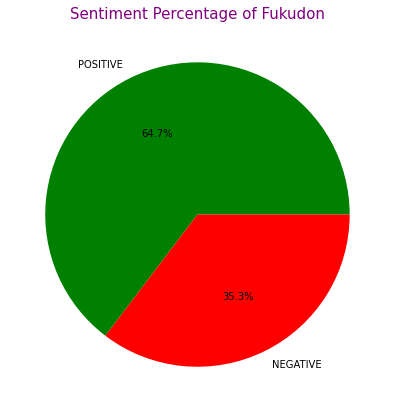

<Figure size 432x288 with 0 Axes>

In [29]:
df = df_sentiment['sentiment'].value_counts()
#pie chart
df.dropna(inplace = True)
labels =df.index
colors = ['green','red']
explode = [0,0]
sizes = df.values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Sentiment Percentage of Fukudon",color = 'purple',fontsize = 15)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig(f"./Colab Notebooks/Sentiment/Fukudon_Sentiments.png")

In [30]:
positive_review_list=positive_review['review'].tolist()
negative_review_list=negative_review['review'].tolist()

In [32]:
df_positive_reviews = pd.DataFrame(positive_review_list)
df_positive_reviews 


,0
0,sukiyaki beef good spicy garlic pork cutlet good prom belly katsu good thunder fries mentai sauce sibei good
1,delicious food prompt delivery excellent service ð¯ð¯ð¯
2,definitely surprise find punggol really affordable japanese food kptpeople behind counter really nice friendlyordered pork belly katsu katsu platter extra serving rice onsen egg less ððfood point portions bigsurely coming back
3,groupbuy communication good arrived hot hot portion quite generous well give try
4,awesome pplawesome food ð
5,good jap food affordable pricingnot mention improved significantly waiting time
6,best best best jap hawker style food ever ðððð
7,pork belly katsu delicious ingredients use fresh recommended colleagues next lunch choice
8,yummzzz unexpectedly good love chicken karaage wcurry sauce
9,food fantastic fresh ingredient yummyðð must try


In [33]:
df_positive_reviews.to_csv(f"./Colab Notebooks/Sentiment/fukudonreviews_postive_counts.csv", 'w', encoding="latin1")

In [34]:
df_negative_reviews = pd.DataFrame(negative_review_list)
df_negative_reviews

,0
0,one fav store pork collar however today pieces burnt meat ð
1,super valued money super affordable yet restaurant standard sukiyaki beef donð returning weekly satisfy cravingsðyes friendly staffs tooð¤£
2,place certainly worthy tried pork katsu beef fell way expectations katsu soggy beef toughhad marine parade outletpunggol outlet might better
3,ååæ¨èè¿å®¶ðððé£ç©å¥½ååä¾¿å®ï¼æ¯èµ·é¤å æ°´åæ´é«ï¼é£æé½å¾æ°é²ãå¾å¤äººç¹é¤ï¼ä½æ¯ä»ä»¬æçå¾é«å¾å¿«ï¼ç¾å³ä½³è´é½æ¯å¼å¾ç­å¾ çððpotato saladæ¯æçæç±ï¼ä½æ¯æ°éæéï¼è¦æ©å»ä¹°ï¼ååpower ðð
4,picture doesnât food justice fav place pork spicy super fragrant super appetising would crave sometimes tried dons including salmon chicken oyakodon katsu really rather worth price point salmon offered tomato salad good katsu might get abit soggy longer crispy would reco going takeaway
5,marine parade saw stall selling japanese constant queue decided try person took order wrote slip paper order order number gave one slip slip person preparing food cashier would shout order number order done would advise ordering get seats near stall know food readyi got teriyaki beef short plate w onsen egg consists beef short plate onions onsen egg furikakeso think dish come onions either minced onions really fine rice rice bad drenched beef drippings added flavour plain rice beef tender coated teriyaki sauce topped furikake furikake think add much value entire dish mostly tasted togarashi japanese chili powder onsen egg little disappointed yolk already brokeoverall average tasting bowl beef felt could given slightly meat maybe add furikake rice instead meat least people eat rice taste
6,folks fukudonsg got mise en place kitchen line tee enabling serve steady stream customers quickly doesnât always work favour beef tender unctuous onsen egg yolk already overcooked nevertheless spot flavours although always rice bowls could definitely saucetaste
7,id hardpressed find another place serving salmon quality price point budget friendly yet tasty donburis queue starts forming way shutters go lunch everyday nooneach serving comes pieces succulent oily salmon coated tangy shoyu lemon glaze side fukudonsg japanese tomato salad bed al dente calrose rice portion small every bite flavour packed want get hands come itâs one bestsellers run inevitablytaste
8,wasnât intending settle dinner marine parade food centre initially pretty bummed fact spot intended dine area many items menu unavailable â thus found heading food centre checking fukudon describes asian fusion donburi specialist following social media quite whilefelt âasian fusion donburiâ branding bit far stretch given various donburi offered menu ie chicken breast oyakodon shoyu glaze salmon sukiyaki beef short plate onsen eg etc sound pretty japaneseinspired â said impressed pork belly katsu opted fried pork belly seems carry bite less gelatinous fatty initially expected especially given illustrations menu element sealed deal us runny egg simmered dashi broth alongside onions â incredibly runny silky eggs also carried punchy savoury note provides much flavour entire dish sauce even permeating bed shortgrain rice gives otherwise plain rice moisture sweetsavoury note japanese spicy powder also sprinkled top provide donburi slight hint spiciness â enough tickle tastebuds without overwhelming entire dishgiven tried fukudon left pretty impressed offer â execution eggs particularly noteworthy pretty much important element makes good oyakodon katsudon itâs offerings seem rather japanese heart seem places quite bit effort trying serve quality food masses pocketfriendly prices quite interested thunder crunchy fries comes either homemade curry sauce mentaiko sauce â something pretty keen try subsequent visit
9,saw new stall marine parade food centre operating bunch young people serving donburi food courtalthough opened recently attracted long queue pe

In [35]:
df_negative_reviews.to_csv(f"./Colab Notebooks/Sentiment/fukudonreviews_negative_counts.csv", 'w', encoding="latin1")

# 6. Topic Analysis BERTopic

## FUKUDON TOPIC MODELLING

In [37]:
!pip install distributed==2021.9.0

     |████████████████████████████████| 779 kB 6.2 MB/s 
     |████████████████████████████████| 1.0 MB 60.6 MB/s 
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Attempting uninstall: distributed
    Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.


In [36]:
!pip install bertopic

     |████████████████████████████████| 57 kB 4.1 MB/s 
     |████████████████████████████████| 79 kB 5.6 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 636 kB 16.0 MB/s 
     |████████████████████████████████| 5.2 MB 15.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 57.4 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330865 sha256=db6c81d8d3d871497ceaa930690421d4053fbc5b43b2894bc5449ecab3812d57
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=0f91a00d0e3c0100eeddfab4af217e6e28cd0561f1f2405e9580fe02ada78c27
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa914

In [38]:
from bertopic import BERTopic
BERTopic

bertopic._bertopic.BERTopic

FUKUDON POSITIVE!!!!!

In [39]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(positive_review_list)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2022-03-27 11:15:33,788 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-03-27 11:15:46,688 - BERTopic - Reduced dimensionality with UMAP
2022-03-27 11:15:46,710 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [40]:
freq = topic_model.get_topic_info(); freq.head(20)

,Topic,Count,Name
0,-1,48,-1_pork_food_good_beef
1,0,22,0_sauce_try_curry_good
2,1,16,1_food_affordable_best_nice


In [41]:
topic_model.get_topic(0)  # Select the most frequent topic

[('sauce', 0.09840604152170009),
 ('try', 0.08045755211239157),
 ('curry', 0.07549505504076331),
 ('good', 0.06896137294113593),
 ('karaage', 0.05438683201192472),
 ('must', 0.05438683201192472),
 ('donburi', 0.05025487232222719),
 ('love', 0.05025487232222719),
 ('fresh', 0.04718440940047707),
 ('japanese', 0.04718440940047707)]

In [42]:
topic_model.visualize_barchart(top_n_topics=2)

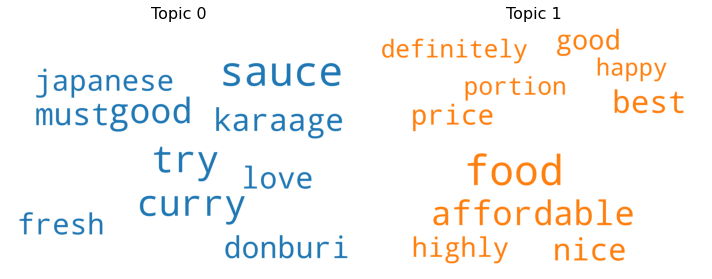

<Figure size 432x288 with 0 Axes>

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

tps = topic_model.get_topics()

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(tps[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig(f"./Colab Notebooks/Topic/Fukudon_Pos_Topics.png")

In [44]:
#value of n_clusters doens't seem to affect the heatmap
topic_model.visualize_heatmap(n_clusters=2, width=1000, height=1000)

In [45]:
# Visualize Topic Probabilities
topic_model.visualize_distribution(probs[1], min_probability=0.015)

In [46]:
topic_model.get_topics()

{-1: [('pork', 0.06549465860798521),
  ('food', 0.05980226312112058),
  ('good', 0.04922145890669103),
  ('beef', 0.04898627357822992),
  ('belly', 0.0464538088347711),
  ('katsu', 0.0464538088347711),
  ('super', 0.04169815261141103),
  ('well', 0.03785868177884743),
  ('ordered', 0.03785868177884743),
  ('tasty', 0.03785868177884743)],
 0: [('sauce', 0.09840604152170009),
  ('try', 0.08045755211239157),
  ('curry', 0.07549505504076331),
  ('good', 0.06896137294113593),
  ('karaage', 0.05438683201192472),
  ('must', 0.05438683201192472),
  ('donburi', 0.05025487232222719),
  ('love', 0.05025487232222719),
  ('fresh', 0.04718440940047707),
  ('japanese', 0.04718440940047707)],
 1: [('food', 0.24121640117665982),
  ('affordable', 0.15446228759551658),
  ('best', 0.12817939017805524),
  ('nice', 0.12547401162538696),
  ('price', 0.10037920930030957),
  ('good', 0.09669059632655772),
  ('highly', 0.09613454263354144),
  ('portion', 0.07938859371856492),
  ('definitely', 0.0793885937185649

In [47]:
topic_model.visualize_topics()

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1592: RuntimeWarning:

k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.



TypeError: ignored

## FUKUDON NEGATIVE

In [ ]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(negative_review_list)

In [ ]:
freq = topic_model.get_topic_info(); freq.head(20)

In [ ]:
topic_model.get_topic(-1)  # Select the most frequent topic

In [ ]:
topic_model.visualize_barchart(top_n_topics=1)

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

tps = topic_model.get_topics()

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(tps[i])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()